<center><img src='https://raw.githubusercontent.com/Jangrae/img/master/ml_python.png' width=600/></center>

# 실습 내용

- Grid Search로 다양한 알고리즘 모델을 튜닝합니다.


# 1.환경 준비

- 기본 라이브러리와 대상 데이터를 가져와 이후 과정을 준비합니다.

In [15]:
# 라이브러리 불러오기
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%config InlineBackend.figure_format='retina'

In [16]:
# 데이터 읽어오기
path = 'https://raw.githubusercontent.com/jangrae/csv/master/diabetes.csv'
data = pd.read_csv(path)

# 2.데이터 이해

- 분석할 데이터를 충분히 이해할 수 있도록 다양한 탐색 과정을 수행합니다.

In [17]:
# 상위 몇 개 행 확인
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [18]:
# 변수 확인
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [19]:
# 기초통계량 확인
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [20]:
# NaN 값 확인
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

# 3.데이터 준비

- 전처리 과정을 통해 머신러닝 알고리즘에 사용할 수 있는 형태의 데이터를 준비합니다.

**1) x, y 분리**

In [21]:
# target 확인
target = 'Outcome'

# 데이터 분리
x = data.drop(target, axis = 1)
y = data[target] 

**2) 정규화**

In [22]:
# 정규화
x = (x - x.min()) / (x.max() - x.min())

**3) 학습용, 평가용 데이터 분리**

In [23]:
# 모듈 불러오기
from sklearn.model_selection import train_test_split

# 7:3으로 분리
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=2022)

# 4.모델링

- GridSearchCV를 사용해 최선의 하이퍼파라미터를 갖는 모델을 만듭니다.
- 우선 사용할 모듈을 모두 불러옵니다.
- 평가 지표는 Classification Report를 사용합니다.

In [68]:
# 모듈 불러오기
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

from sklearn.metrics import confusion_matrix, classification_report
# from sklearn.metrics import mean_absolute_error, r2_score

from sklearn.model_selection import GridSearchCV

## 4.1.KNN

- 파라미터 
    - n_neighbors: range(1, 11)
- GridSearchCV 선언
    - cv = 5
    - scoring = 'accuracy'

In [48]:
# 1단계: 불러오기
model_knn = KNeighborsClassifier()

param = {'n_neighbors': range(1, 11)}

model = GridSearchCV(model_knn, param, cv=5, scoring='accuracy')

In [38]:
# 학습하기
model.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(1, 11)}, scoring='accuracy')

In [39]:
# 최적파라미터, 성능 확인
print(model.best_params_)
print(model.best_score_)

{'n_neighbors': 9}
0.7485462097611629


In [40]:
# 예측하기
y_pred = model.predict(x_test)

In [43]:
# 평가하기
print("confusion_matrix : ", confusion_matrix(y_test, y_pred))
print("classification_report : ", classification_report(y_test, y_pred))

confusion_matrix :  [[138  23]
 [ 37  33]]
classification_report :                precision    recall  f1-score   support

           0       0.79      0.86      0.82       161
           1       0.59      0.47      0.52        70

    accuracy                           0.74       231
   macro avg       0.69      0.66      0.67       231
weighted avg       0.73      0.74      0.73       231



## 4.2.Decision Tree
- random_state = 2022
- 파라미터
    - max_depth: range(1, 11)
- GridSearchCV 선언
    - cv = 5
    - scoring = 'accuracy'

In [80]:
# 선언하기
model_tree = DecisionTreeClassifier(random_state=2022)

param = {'max_depth': range(1, 11)}

model = GridSearchCV(model_tree, param, cv=5, scoring='accuracy')


In [81]:
# 학습하기
model.fit(x, y)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=2022),
             param_grid={'max_depth': range(1, 11)}, scoring='accuracy')

In [82]:
# 최적파라미터, 성능 확인
print(model.best_params_)
print(model.best_score_)

{'max_depth': 5}
0.7474747474747474


In [83]:
# 예측하기
y_pred = model.predict(x_test)

In [84]:
# 평가하기
print(confusion_matrix(y_test, y_pred))
print('recall_score : ', classification_report(y_test, y_pred))

[[149  12]
 [ 30  40]]
recall_score :                precision    recall  f1-score   support

           0       0.83      0.93      0.88       161
           1       0.77      0.57      0.66        70

    accuracy                           0.82       231
   macro avg       0.80      0.75      0.77       231
weighted avg       0.81      0.82      0.81       231



#### 시각화

<BarContainer object of 8 artists>

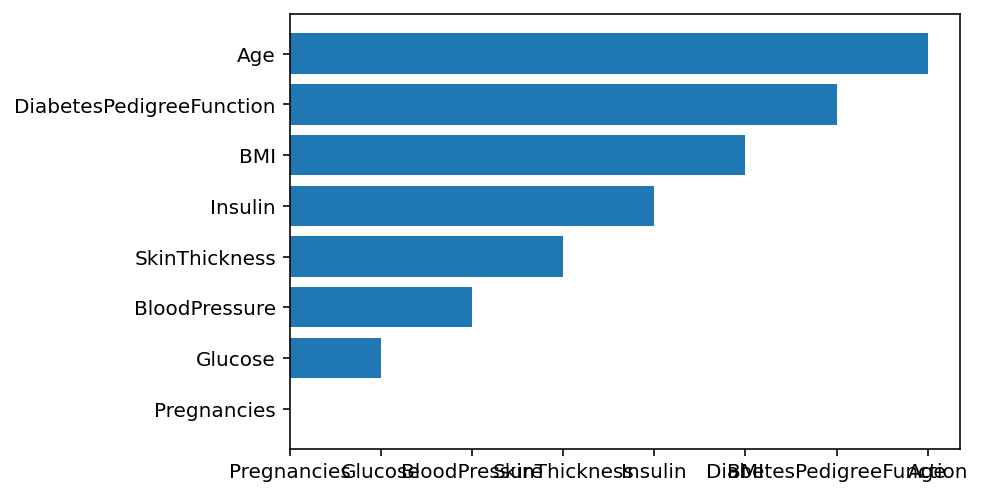

In [90]:
plt.barh(y=list(x), width=model.best_estimator_.feature_names_in_)

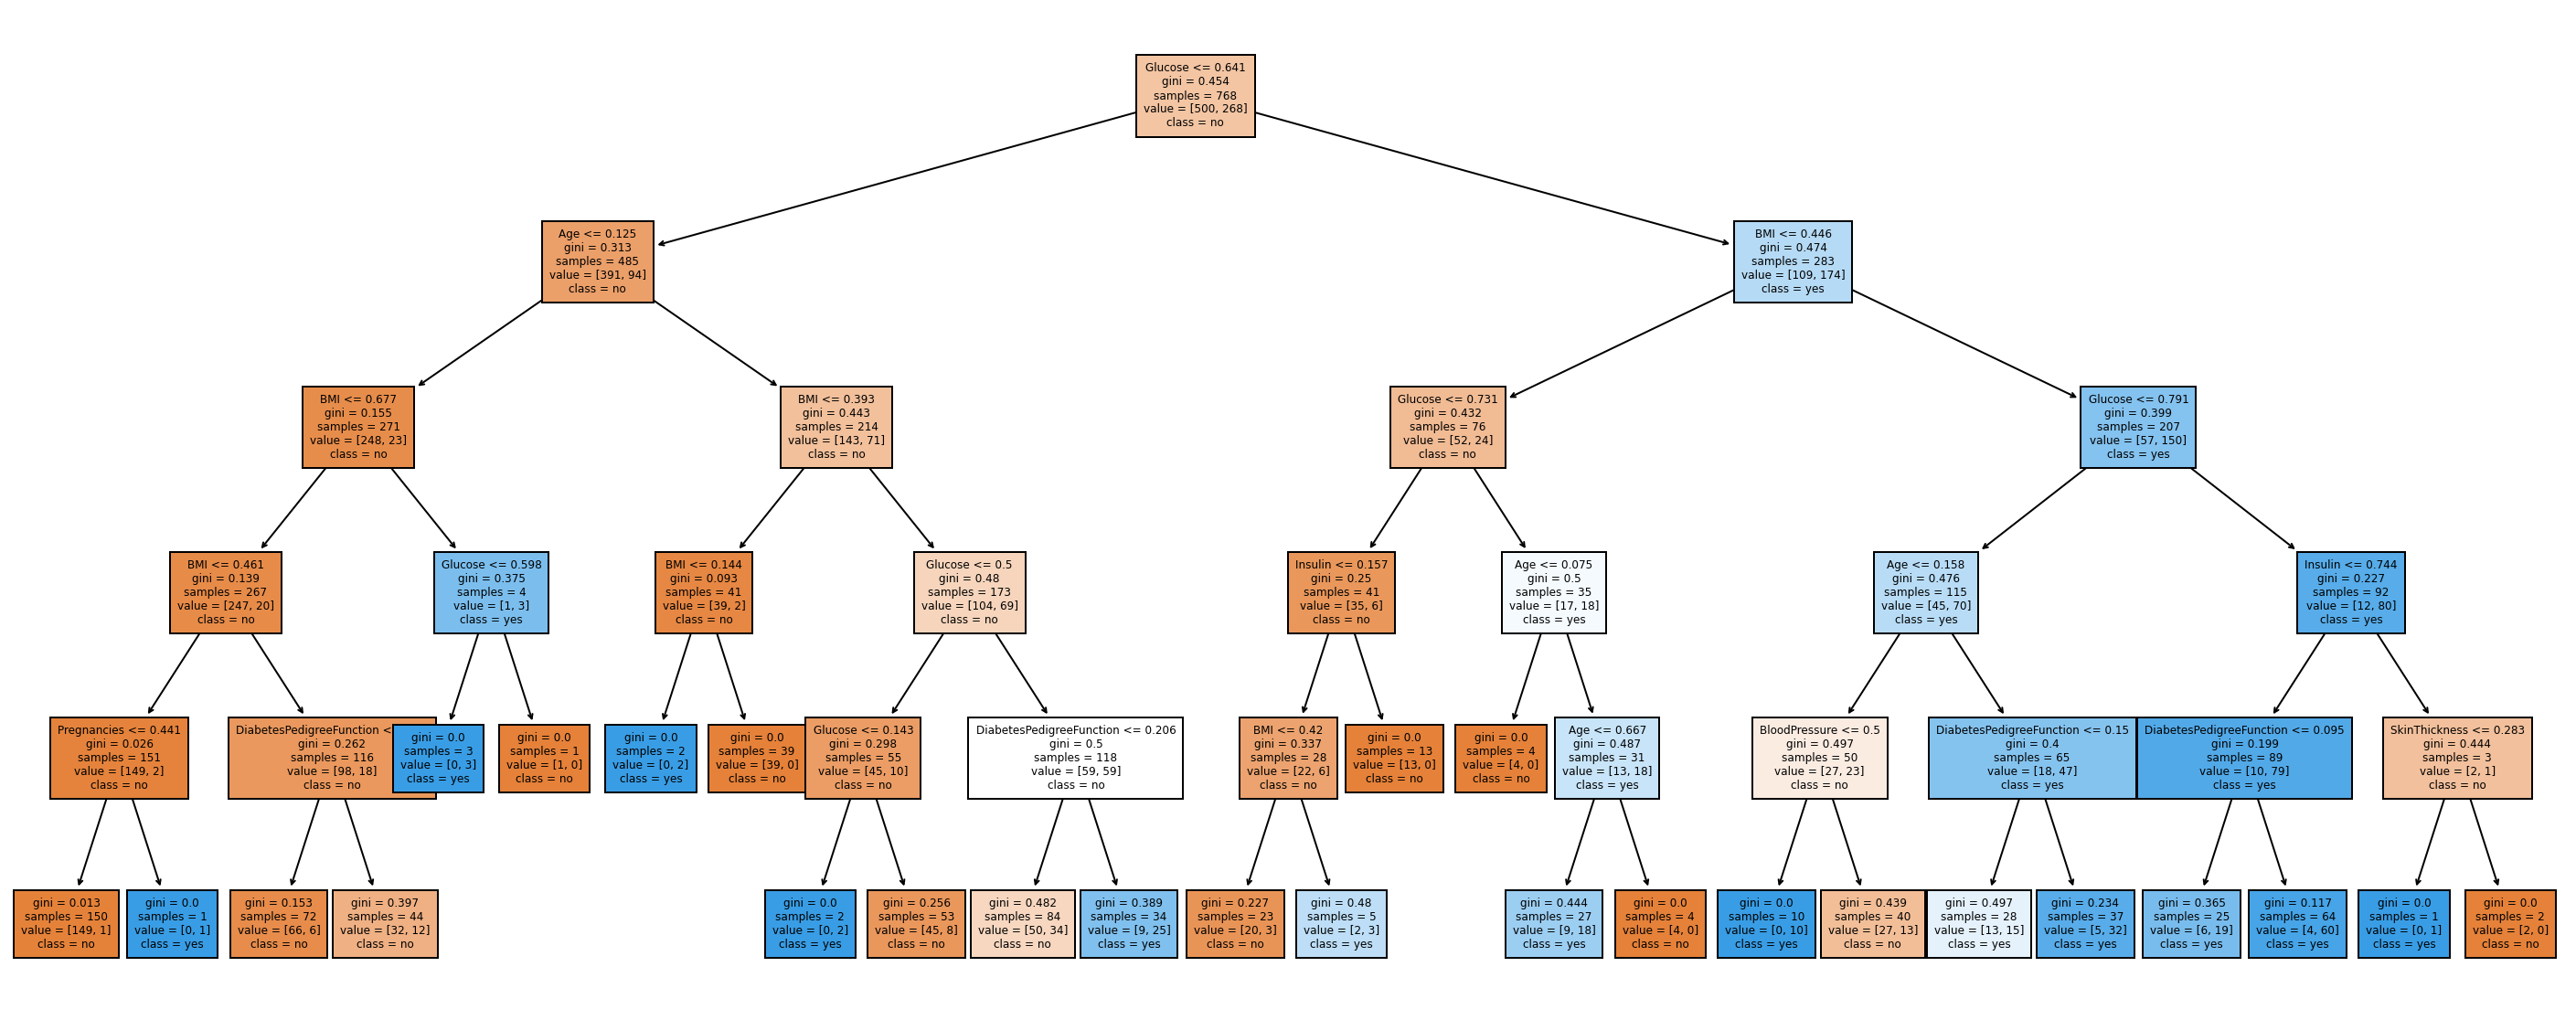

In [91]:
# 1. 트리 불러오기
from sklearn.tree import plot_tree

# 2. 시각화
plt.figure(figsize=(25, 10))
plot_tree(model.best_estimator_,
          filled=True,
          feature_names=list(x),  # 박스 표시내 컬럼 본 이름으로 표시됨
          class_names=['no', 'yes'],
          fontsize=6
         )
plt.show()

## 4.3.Logistic Regression

- GridSearchCV를 사용하지 않고 모델링합니다.

In [92]:
# 선언하기
model = LogisticRegression(max_iter=300)


In [93]:
# 학습하기
model.fit(x_train, y_train)

LogisticRegression(max_iter=300)

In [94]:
# 예측하기
y_pred = model.predict(x_test)

In [95]:
# 평가하기
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[149  12]
 [ 39  31]]
              precision    recall  f1-score   support

           0       0.79      0.93      0.85       161
           1       0.72      0.44      0.55        70

    accuracy                           0.78       231
   macro avg       0.76      0.68      0.70       231
weighted avg       0.77      0.78      0.76       231



#### 가시화
- 

<BarContainer object of 8 artists>

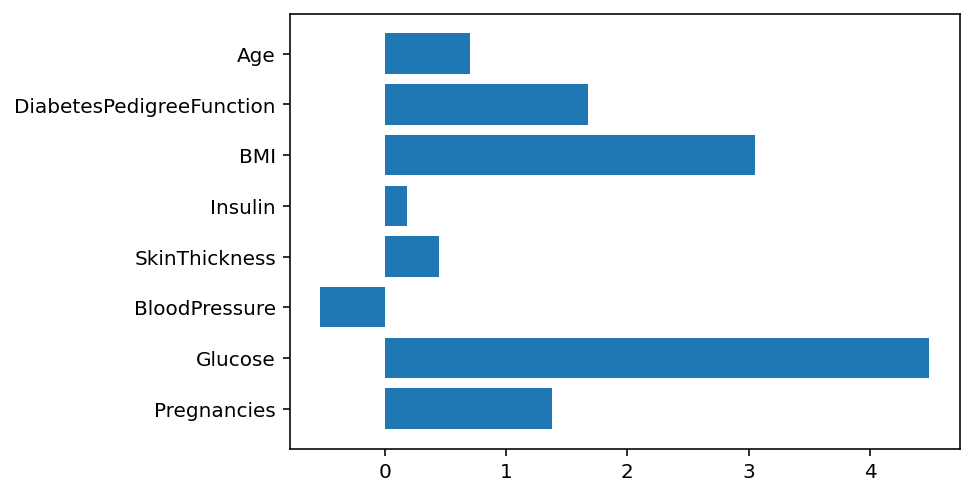

In [98]:
# model.coef_.reshape(-1) 1차원 배열 맞추기
plt.barh(y=list(x), width=model.coef_.reshape(-1))

## 4.4.SVM

- 파라미터
    - C: [0.0001, 0.001, 0.01, 1, 10, 100, 1000, 10000]
    - gamma: [0.00001, 0.0001, 0.001, 0.01, 1, 10, 100]
- GridSearchCV 선언
    - cv = 5
    - scoring = 'accuracy'

In [69]:
# 선언하기
model_svr = SVC()

# 파라미터 선언
param = {'C' : [0.0001, 0.001, 0.01, 1, 10, 100, 1000, 10000], 'gamma' :  [0.00001, 0.0001, 0.001, 0.01, 1, 10, 100]}

# Grid Search 모델 선언하기
model = GridSearchCV(model_svr, param, cv=5, scoring='accuracy')


In [70]:
# 학습하기
model.fit(x, y)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.0001, 0.001, 0.01, 1, 10, 100, 1000, 10000],
                         'gamma': [1e-05, 0.0001, 0.001, 0.01, 1, 10, 100]},
             scoring='accuracy')

In [71]:
# 최적파라미터, 성능 확인
print(model.best_params_)
print(model.best_score_)

{'C': 1, 'gamma': 1}
0.7799847211611917


In [72]:
# 예측하기
y_pred = model.predict(x_test)

In [73]:
# 평가하기
print(mean_absolute_error(y_test, y_pred))
print(r2_score(y_test, y_pred))

0.21212121212121213
-0.004347826086956719


### 참고자료

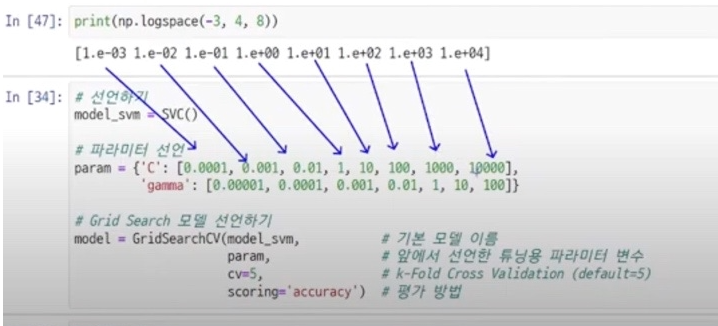

In [74]:
np.set_printoptions(suppress=True)
print(np.logspace(-3, 4, 8))

[    0.001     0.01      0.1       1.       10.      100.     1000.
 10000.   ]
